In [11]:
library(lme4)
library(nlme)
#require(utils)


Attaching package: ‘nlme’

The following object is masked from ‘package:lme4’:

    lmList



# 1. Loblolly example

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	84 obs. of  3 variables:
 $ height: num  4.51 10.89 28.72 41.74 52.7 ...
 $ age   : num  3 5 10 15 20 25 3 5 10 15 ...
 $ Seed  : Ord.factor w/ 14 levels "329"<"327"<"325"<..: 10 10 10 10 10 10 13 13 13 13 ...
 - attr(*, "formula")=Class 'formula'  language height ~ age | Seed
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Age of tree"
  ..$ y: chr "Height of tree"
 - attr(*, "units")=List of 2
  ..$ x: chr "(yr)"
  ..$ y: chr "(ft)"


     height           age            Seed   
 Min.   : 3.46   Min.   : 3.0   329    : 6  
 1st Qu.:10.47   1st Qu.: 5.0   327    : 6  
 Median :34.00   Median :12.5   325    : 6  
 Mean   :32.36   Mean   :13.0   307    : 6  
 3rd Qu.:51.36   3rd Qu.:20.0   331    : 6  
 Max.   :64.10   Max.   :25.0   311    : 6  
                                (Other):48  

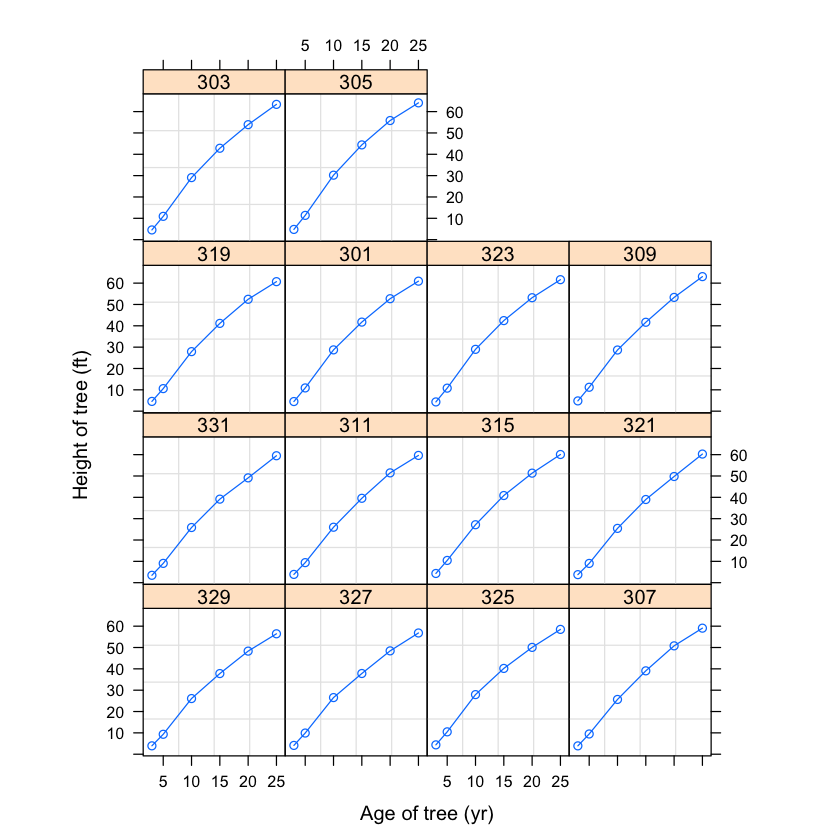

In [12]:
# Load data
data(Loblolly)

# Data viz
plot(Loblolly)
str(Loblolly)
summary(Loblolly)

## First model: self starting asymptotic

In [13]:
# uses nlme
fm1 <- nlme(height ~ SSasymp(age, Asym, R0, lrc),
            data = Loblolly,
            fixed = Asym + R0 + lrc ~ 1,
            random = Asym ~ 1,
            start = c(Asym = 103, R0 = -8.5, lrc = -3.3))
summary(fm1)

Nonlinear mixed-effects model fit by maximum likelihood
  Model: height ~ SSasymp(age, Asym, R0, lrc) 
 Data: Loblolly 
       AIC      BIC    logLik
  239.4856 251.6397 -114.7428

Random effects:
 Formula: Asym ~ 1 | Seed
            Asym  Residual
StdDev: 3.650642 0.7188625

Fixed effects: Asym + R0 + lrc ~ 1 
         Value Std.Error DF   t-value p-value
Asym 101.44960 2.4616951 68  41.21128       0
R0    -8.62733 0.3179505 68 -27.13420       0
lrc   -3.23375 0.0342702 68 -94.36052       0
 Correlation: 
    Asym   R0    
R0   0.704       
lrc -0.908 -0.827

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.23601930 -0.62380854  0.05917466  0.65727206  1.95794425 

Number of Observations: 84
Number of Groups: 14 

## Second model: add random effects covariance matrix

In [14]:
# uses nlme
fm2 <- update(fm1, random = pdDiag(Asym + lrc ~ 1))
summary(fm2)

Nonlinear mixed-effects model fit by maximum likelihood
  Model: height ~ SSasymp(age, Asym, R0, lrc) 
 Data: Loblolly 
       AIC      BIC    logLik
  238.9662 253.5511 -113.4831

Random effects:
 Formula: list(Asym ~ 1, lrc ~ 1)
 Level: Seed
 Structure: Diagonal
            Asym        lrc  Residual
StdDev: 2.806185 0.03449969 0.6920003

Fixed effects: Asym + R0 + lrc ~ 1 
         Value Std.Error DF   t-value p-value
Asym 101.85205 2.3239828 68  43.82651       0
R0    -8.59039 0.3058441 68 -28.08747       0
lrc   -3.24011 0.0345017 68 -93.91167       0
 Correlation: 
    Asym   R0    
R0   0.727       
lrc -0.902 -0.796

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.06072906 -0.69785679  0.08721706  0.73687722  1.79015782 

Number of Observations: 84
Number of Groups: 14 

# 2. Brain growth data

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	114 obs. of  4 variables:
 $ Age      : num  357 449 552 735 917 114 209 293 391 463 ...
 $ ICV      : num  989 1057 1066 1109 1181 ...
 $ Sex      : chr  "Female" "Female" "Female" "Female" ...
 $ SubjectID: Ord.factor w/ 17 levels "S1507"<"S1468"<..: 5 5 5 5 5 6 6 6 6 6 ...
 - attr(*, "formula")=Class 'formula'  language ICV ~ Age | SubjectID
  .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
 - attr(*, "FUN")=function (x)  
 - attr(*, "order.groups")= logi TRUE


      Age              ICV             Sex              SubjectID 
 Min.   :   8.0   Min.   : 511.9   Length:114         S1460  : 9  
 1st Qu.: 292.2   1st Qu.: 985.4   Class :character   S1468  : 8  
 Median : 470.5   Median :1106.6   Mode  :character   S1502  : 8  
 Mean   : 591.7   Mean   :1089.3                      S1508  : 8  
 3rd Qu.: 764.8   3rd Qu.:1223.4                      S1555  : 8  
 Max.   :1539.0   Max.   :1513.8                      S1510  : 8  
                                                      (Other):65  

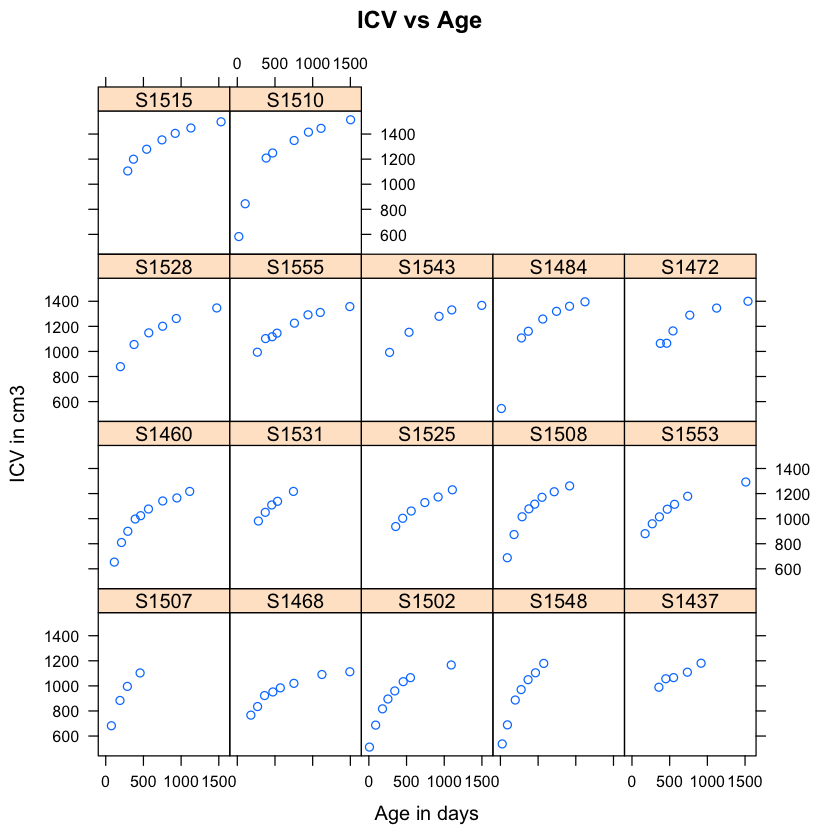

In [16]:
# Load data
brain <- read.csv(file="dyn.csv",head=TRUE,sep=",",stringsAsFactors=F)

# Scale ICV to cm3
brain['ICV'] = brain['ICV']/1000.0

# Group (if using nlme)
brain <- groupedData(ICV ~ Age | SubjectID, data=brain)

# Data viz
# plot(brain) # if using nlme
library(lattice) 
xyplot(ICV~Age|SubjectID, data=brain, main="ICV vs Age", ylab="ICV in cm3", xlab="Age in days")
str(brain)
summary(brain)

## First model: linear mixed effect, with random intercept

In [17]:
fm1 <- lmer(ICV ~ Age + (1|SubjectID), data = brain)
summary(fm1)

Linear mixed model fit by REML ['lmerMod']
Formula: ICV ~ Age + (1 | SubjectID)
   Data: brain

REML criterion at convergence: 1395.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5626 -0.2527  0.2287  0.5431  1.4556 

Random effects:
 Groups    Name        Variance Std.Dev.
 SubjectID (Intercept)  4385     66.22  
 Residual              10306    101.52  
Number of obs: 114, groups:  SubjectID, 17

Fixed effects:
            Estimate Std. Error t value
(Intercept) 840.5637    24.3705   34.49
Age           0.4237     0.0263   16.11

Correlation of Fixed Effects:
    (Intr)
Age -0.639

## Second model: nonlinear

In [18]:
# using nlme
initVals <- getInitial(ICV ~ SSasymp(Age, Asym, R0, lrc), data = brain)
initVals
fm2 <- nlme(ICV ~ SSasymp(Age, Asym, R0, lrc),
            fixed = Asym + R0 + lrc ~ 1,
            random = Asym ~ 1|SubjectID,
            start = initVals,
            data = brain)
summary(fm2)

s <- getInitial(ICV ~ SSasymp(Age, Asym, R0, lrc), data = brain)
fm2 <- nlmer(ICV~SSasymp(Age,Asym,R0,lrc)~(Asym|SubjectID), start=c(Asym=s$Asym,R0=s$R0,lrc=s$lrc), data=brain)
summary(fm2)

$Asym
[1] 1362.091

$R0
[1] 537.9124

$lrc
[1] -5.987269

ERROR: Error in nlme.formula(ICV ~ SSasymp(Age, Asym, R0, lrc), fixed = Asym + : 'start' must have a component called 'fixed'


In [10]:
ff <- nls(ICV ~ SSasymp(Age,Asym,R0,lrc)|SubjectID, start=c(Asym=s$Asym,R0=s$R0,lrc=s$lrc), data=brain)

ERROR: Error in SSasymp(Age, Asym, R0, lrc) | SubjectID: operations are possible only for numeric, logical or complex types
